In [14]:
import numpy as np
import sklearn
import autosklearn.classification
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import shutil
import tempfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def evaluate(model, X_test_features, y_test):
    y_pred = model.predict(X_test_features)
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Test Accuracy: {accuracy_test}")
    print(f'Mean Squared Error: {mse:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_pred, y_test)
    class_labels = ['NORMAL', 'PNEUMONIA']
    
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix For AutoML - Baseline')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=class_labels)
    print(report)


In [16]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/y_test.npy"

In [17]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

### Without Feature Reduction

/home/dawlat.akaila/.conda/envs/ai701/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34855 instead
  warnings.warn(


Validation Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.38621794871794873
Mean Squared Error: 0.61


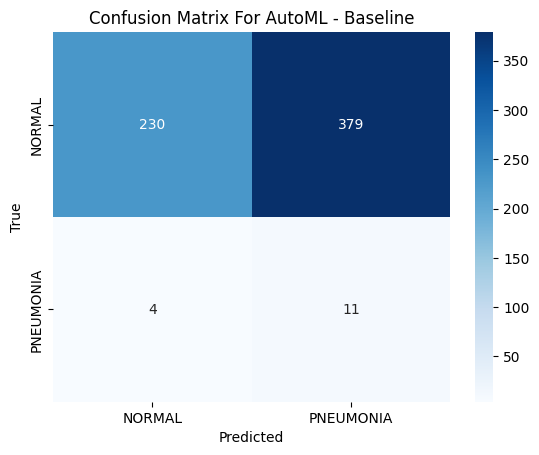

              precision    recall  f1-score   support

      NORMAL       0.38      0.98      0.55       234
   PNEUMONIA       0.73      0.03      0.05       390

    accuracy                           0.39       624
   macro avg       0.56      0.51      0.30       624
weighted avg       0.60      0.39      0.24       624

auto-sklearn results:
  Dataset name: 29985bf3-88b6-11ee-9f6e-b496916b807c
  Metric: accuracy
  Best validation score: 0.968641
  Number of target algorithm runs: 43
  Number of successful target algorithm runs: 30
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 9
  Number of target algorithms that exceeded the memory limit: 4



In [33]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=180,
        per_run_time_limit=60,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')     


    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_features, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### Experimenting on 100 Features

In [19]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/y_test.npy"

In [20]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

/tmp/ipykernel_3301230/831915851.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


Validation Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.38621794871794873
Mean Squared Error: 0.61


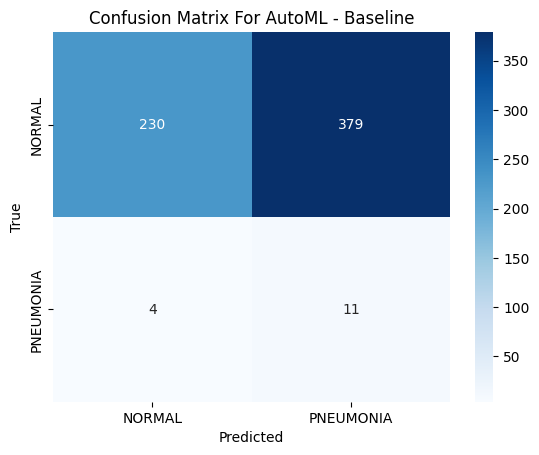

              precision    recall  f1-score   support

      NORMAL       0.38      0.98      0.55       234
   PNEUMONIA       0.73      0.03      0.05       390

    accuracy                           0.39       624
   macro avg       0.56      0.51      0.30       624
weighted avg       0.60      0.39      0.24       624

auto-sklearn results:
  Dataset name: 6c90c3cd-88b1-11ee-9f6e-b496916b807c
  Metric: accuracy
  Best validation score: 0.968641
  Number of target algorithm runs: 44
  Number of successful target algorithm runs: 31
  Number of crashed target algorithm runs: 2
  Number of target algorithms that exceeded the time limit: 7
  Number of target algorithms that exceeded the memory limit: 4



In [21]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)

    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')


    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_features, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### LDA

In [22]:
# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_features)
X_val_std = scaler.transform(X_val_features)
X_test_std = scaler.transform(X_test_features)

In [23]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Set the desired number of components
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_val_lda = lda.transform(X_val_std)
X_test_lda = lda.transform(X_test_std)

/tmp/ipykernel_3301230/1815610597.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


[WARNING] [2023-11-22 01:05:35,108:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-22 01:05:35,413:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-22 01:05:35,775:Client-EnsembleBuilder] No runs were available to build an ensemble from
Validation Accuracy: 0.4375
Mean Squared Error: 0.56
Test Accuracy: 0.3942307692307692
Mean Squared Error: 0.61


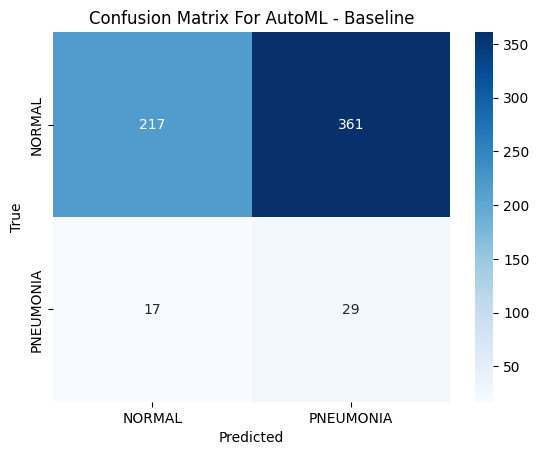

              precision    recall  f1-score   support

      NORMAL       0.38      0.93      0.53       234
   PNEUMONIA       0.63      0.07      0.13       390

    accuracy                           0.39       624
   macro avg       0.50      0.50      0.33       624
weighted avg       0.53      0.39      0.28       624

auto-sklearn results:
  Dataset name: b4b819cd-88b1-11ee-9f6e-b496916b807c
  Metric: accuracy
  Best validation score: 0.965157
  Number of target algorithm runs: 69
  Number of successful target algorithm runs: 46
  Number of crashed target algorithm runs: 21
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [24]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_lda, y_train)
    y_pred_val = automl_classifier.predict(X_val_lda)
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_lda, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### PCA

In [32]:
scaled_X_train = scaler.fit_transform(X_train_features)
scaled_X_val = scaler.transform(X_val_features)
scaled_X_test = scaler.transform(X_test_features)

n_components = 16
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(scaled_X_train)
X_val_pca = pca.fit_transform(scaled_X_val)
X_test_pca = pca.fit_transform(scaled_X_test)

print(X_train_pca.shape)
print(X_val_pca.shape)
print(X_test_pca.shape)

(5216, 16)
(16, 16)
(624, 16)


/tmp/ipykernel_3301230/1839312440.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


Validation Accuracy: 0.4375
Mean Squared Error: 0.56
Test Accuracy: 0.5400641025641025
Mean Squared Error: 0.46


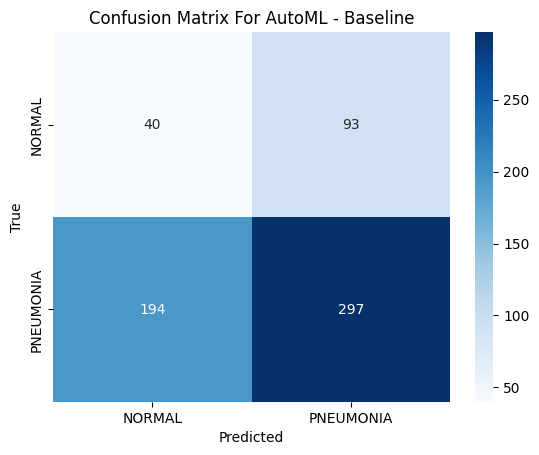

              precision    recall  f1-score   support

      NORMAL       0.30      0.17      0.22       234
   PNEUMONIA       0.60      0.76      0.67       390

    accuracy                           0.54       624
   macro avg       0.45      0.47      0.45       624
weighted avg       0.49      0.54      0.50       624

auto-sklearn results:
  Dataset name: faa9d4ac-88b1-11ee-9f6e-b496916b807c
  Metric: accuracy
  Best validation score: 0.952381
  Number of target algorithm runs: 41
  Number of successful target algorithm runs: 31
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 10
  Number of target algorithms that exceeded the memory limit: 0



In [28]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_pca, y_train)
    y_pred_val = automl_classifier.predict(X_val_pca)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_pca, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### T-SNE

In [29]:
# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train_features)
X_val_scaled = scaler.transform(X_val_features)
X_test_scaled = scaler.transform(X_test_features)

# Apply t-SNE to reduce the dimensionality to 2D for scaled data
tsne = TSNE(n_components=2,perplexity=5)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_val_tsne = tsne.fit_transform(X_val_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

/tmp/ipykernel_3301230/933916245.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


[WARNING] [2023-11-22 01:10:10,550:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
Validation Accuracy: 0.625
Mean Squared Error: 0.38
Test Accuracy: 0.592948717948718
Mean Squared Error: 0.41


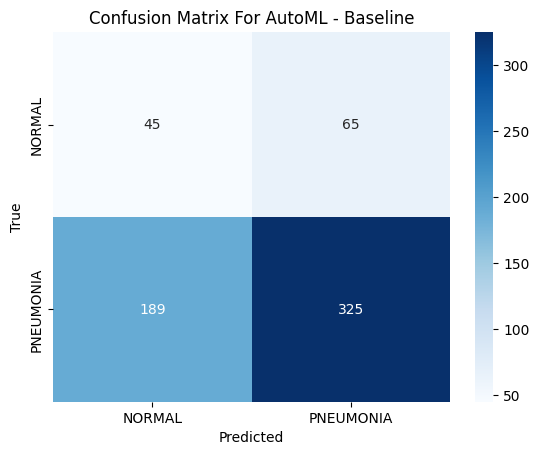

              precision    recall  f1-score   support

      NORMAL       0.41      0.19      0.26       234
   PNEUMONIA       0.63      0.83      0.72       390

    accuracy                           0.59       624
   macro avg       0.52      0.51      0.49       624
weighted avg       0.55      0.59      0.55       624

auto-sklearn results:
  Dataset name: 5792bbb4-88b2-11ee-9f6e-b496916b807c
  Metric: accuracy
  Best validation score: 0.944832
  Number of target algorithm runs: 55
  Number of successful target algorithm runs: 51
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 0



In [30]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_tsne, y_train)
    y_pred_val = automl_classifier.predict(X_val_tsne)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_tsne, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

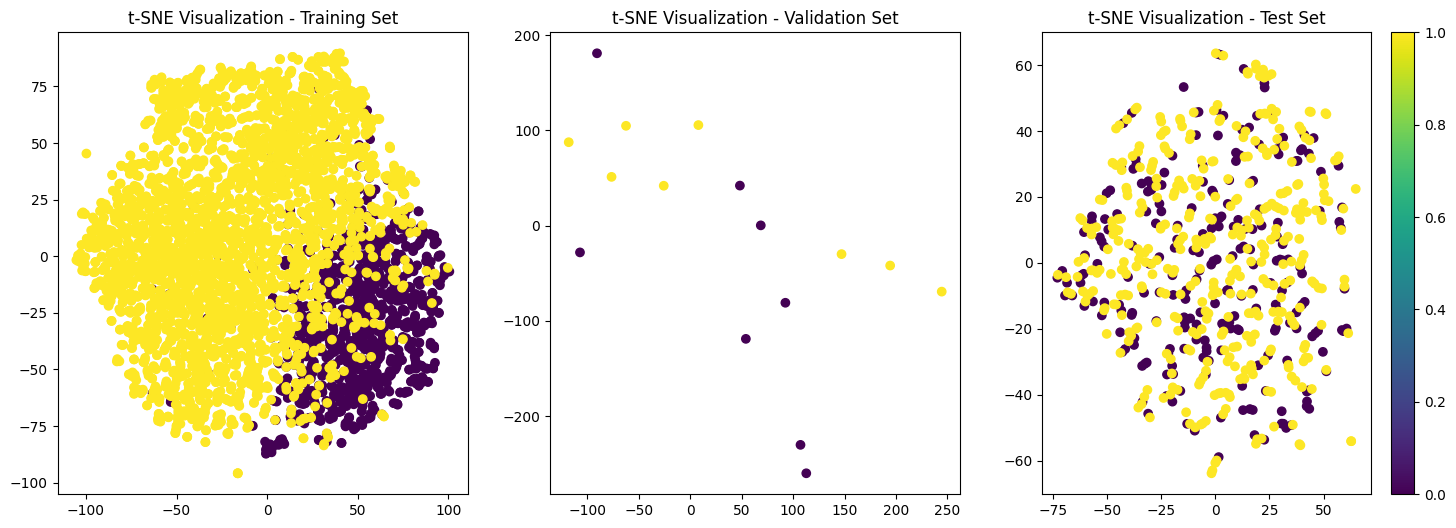

In [31]:
# Create scatter plots for training, validation, and test sets
# (similar to the previous example)
# Create scatter plots for training, validation, and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Visualization - Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1], c=y_val, cmap='viridis')
plt.title('t-SNE Visualization - Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Visualization - Test Set')

plt.colorbar()
plt.show()